# Program II: Sorting Algorithms
### David Mbele, Wesley Jochman, Caleb Andreano

Runtime complexity of sorting algorithms are intrinsically tied to the runtime ordering of the data operated on. Sorting algorithms with identical asymptotic complexity can have significantly different best and worst cases. In this report, two $O(n)$ sorting algorithms, Insertion Sort and Selection Sort are implemented, compared and benchmarked for varying sample sizes. Additionally, regression modeling is applied to each algorithm to provide an estimate of asymptotic runtime. 

## Insertion Sort

In [16]:
def insertion_sort(input):
    for i in range(1, len(input)):
        key = input[i]
        j = i - 1
        while j >= 0 and key < input[j]:
            input[j + 1] = input[j]
            j -= 1
        input[j + 1] = key

In [17]:
input = [4, 3, 2, 1]
insertion_sort(input)
assert input == [1, 2, 3, 4]

# Test with already sorted list
input = [1, 2, 3, 4]
insertion_sort(input)
assert input == [1, 2, 3, 4]

# Test with negative numbers
input = [-4, -3, -2, -1]
insertion_sort(input)
assert input == [-4, -3, -2, -1]

input = [-1, -2, -3, -4]
insertion_sort(input)
assert input == [-4, -3, -2, -1]

# Test with mixed numbers
input = [-4, 3, -2, 1]
insertion_sort(input)
assert input == [-4, -2, 1, 3]

input = [4, -3, 2, -1]
insertion_sort(input)
assert input == [-3, -1, 2, 4]

# Test with empty list
input = []
insertion_sort(input)
assert input == []

# Test with single element
input = [1]
insertion_sort(input)
assert input == [1]

# Test with two elements
input = [2, 1]
insertion_sort(input)
assert input == [1, 2]

# Test with large list
input = list(range(1000, 0, -1))
insertion_sort(input)
assert input == list(range(1, 1001))

# Selection Sort

In [18]:
def selection_sort(input):
    for i in range(len(input)):
        min_index = i
        for j in range(i + 1, len(input)):
            if input[j] < input[min_index]:
                min_index = j
        input[i], input[min_index] = input[min_index], input[i]


In [19]:

# Test with positive numbers
input = [4, 3, 2, 1]
selection_sort(input)
assert input == [1, 2, 3, 4]

# Test with already sorted list
input = [1, 2, 3, 4]
selection_sort(input)
assert input == [1, 2, 3, 4]

# Test with negative numbers
input = [-4, -3, -2, -1]
selection_sort(input)
assert input == [-4, -3, -2, -1]

input = [-1, -2, -3, -4]
selection_sort(input)
assert input == [-4, -3, -2, -1]

# Test with mixed numbers
input = [-4, 3, -2, 1]
selection_sort(input)
assert input == [-4, -2, 1, 3]

input = [4, -3, 2, -1]
selection_sort(input)
assert input == [-3, -1, 2, 4]

# Test with empty list
input = []
selection_sort(input)
assert input == []

# Test with single element
input = [1]
selection_sort(input)
assert input == [1]

# Test with two elements
input = [2, 1]
selection_sort(input)
assert input == [1, 2]

# Test with large list
input = list(range(1000, 0, -1))
selection_sort(input)
assert input == list(range(1, 1001))

## Benchmarking
#### Benchmark Helper functions

In [20]:
from enum import Enum
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import time
class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def benchmark(sorting_algorithm, input_list):
    start_time = time.perf_counter()
    sorting_algorithm(input_list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            for i in range(length):
                l[i] = randint(0, length*10)
        case Ordering.Sorted:
            for i in range(length):
                l[i] = i
        case Ordering.RevSorted:
            for i in range(length):
                l[i] = (length - i - 1)
    return l

list_sizes = [100, 1000, 2500, 10000, 20000, 30000, 50000]


#### Insertion Sort

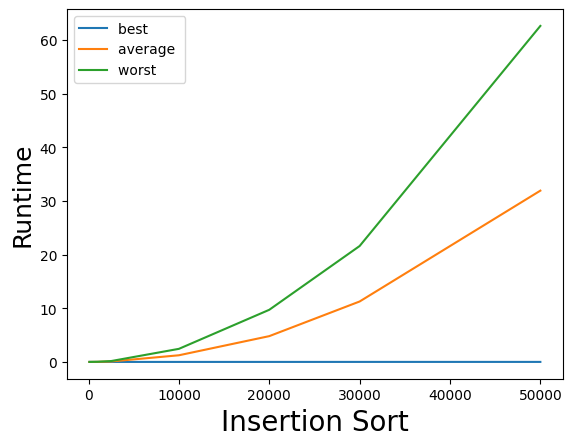

In [22]:
is_run_times = {"best": [], "worst": [], "average": []}
for size in list_sizes: 
    is_run_times["best"].append(benchmark(insertion_sort, generate_list(Ordering.Sorted, size)))
    is_run_times["worst"].append(benchmark(insertion_sort, generate_list(Ordering.RevSorted, size)))
    is_run_times["average"].append(benchmark(insertion_sort, generate_list(Ordering.Unsorted, size)))

plt.plot(list_sizes, is_run_times["best"], label="best ")
plt.plot(list_sizes, is_run_times["average"], label="average ")
plt.plot(list_sizes, is_run_times["worst"], label="worst ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.xlabel("Insertion Sort", fontsize=20)
plt.legend()

In [ ]:
m, b, _, _, _ = linregress(np.log(list_sizes), np.log(is_run_times["best"]))
print(f"Best case m: {m}, b: {b}")
m, b, _, _, _ = linregress(np.log(list_sizes), np.log(is_run_times["average"]))
m, b, _, _, _ = linregress(np.log(list_sizes), np.log(is_run_times["worst"]))

#### Selection Sort

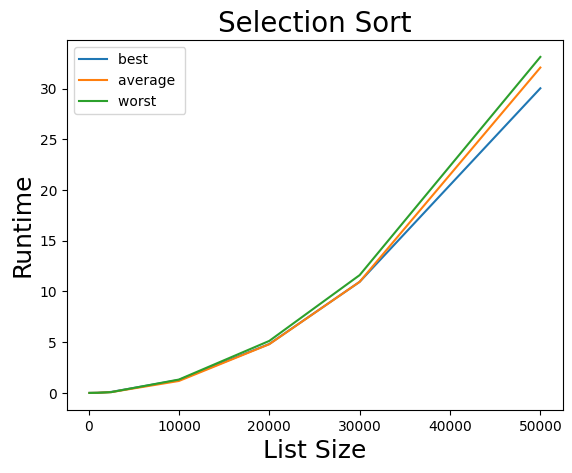

In [23]:
ss_run_times = {"best": [], "worst": [], "average": []}
for size in list_sizes: 
    ss_run_times["best"].append(benchmark(selection_sort, generate_list(Ordering.Sorted, size)))
    ss_run_times["worst"].append(benchmark(selection_sort, generate_list(Ordering.RevSorted, size)))
    ss_run_times["average"].append(benchmark(selection_sort, generate_list(Ordering.Unsorted, size)))

plt.plot(list_sizes, ss_run_times["best"], label="best ")
plt.plot(list_sizes, ss_run_times["average"], label="average ")
plt.plot(list_sizes, ss_run_times["worst"], label="worst ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()

#### Comparison

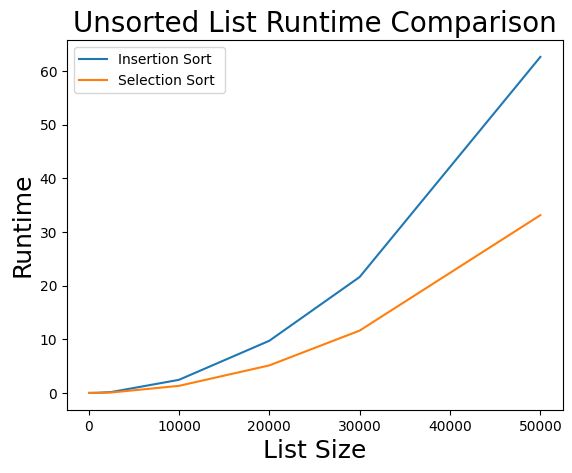

In [25]:
plt.plot(list_sizes, is_run_times["worst"], label="Insertion Sort ")
plt.plot(list_sizes, ss_run_times["worst"], label="Selection Sort ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.title("Reverse Sorted List Runtime Comparison", fontsize=20)
plt.legend()

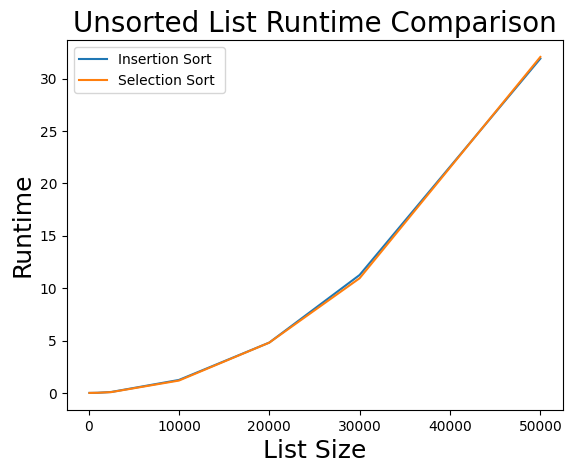

In [26]:
plt.plot(list_sizes, is_run_times["average"], label="Insertion Sort ")
plt.plot(list_sizes, ss_run_times["average"], label="Selection Sort ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.title("Unsorted List Runtime Comparison", fontsize=20)
plt.legend()

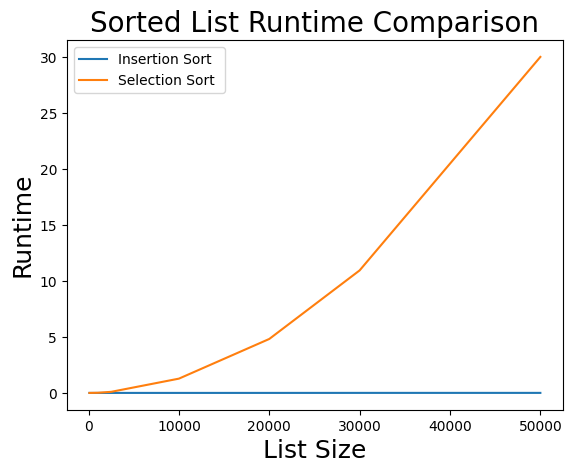

In [27]:
plt.plot(list_sizes, is_run_times["best"], label="Insertion Sort ")
plt.plot(list_sizes, ss_run_times["best"], label="Selection Sort ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.title("Sorted List Runtime Comparison", fontsize=20)
plt.legend()